# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smartcab does not move at all with the default code. It is getting low positive rewards (~1-2) when the light is red, since usually waiting is the correct response in this case (except if you want to turn right and there is no traffic coming straight-on from the left). The cab is not intelligent in any way, but is just by chance doing the correct thing. When the light is green and it still doesn't move it is punished with higher negative 'rewards' (~-5) (except in the case when it wants to turn left and there is traffic from the front either going straight-on or trying to turn right, in which case it is by chance doing the right thing and even getting rewarded for it). My implentation of the agent should be able to work out these negative rewards are worse than the small positive rewards it is also receiving and so figure out it must start moving and doing something in order to get a good score and reach the goal.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
3 of the flags from agent.py file:
1) verbose - if set to true more detailed information about the simulation will be printed to the screen. This can be useful for debugging.
2) update_delay - sets how often the actions are taken and GUI updated
3) epsilon - sets the exploration factor; this sets the probability that the learner will try a random action rather than the currentky-know best action from the Q-table. (I.e. epsilon = 1 (default) always tries random action, epsilon = 0 always does best action and epsilon = 0.5 has equal chance of doing both, etc)

The function called inside environment.py when the agent performs an action action is called 'act()'. It checks if the action is legal and hands out a reward/penalty based on this and the time remaining.

In the simulator.py file, render_text() is used when GUI is not available and render() is used when GUI is used. render_text() prints more detailed information to the terminal about what actions/rewards/etc have occured in the environment to try and allow a user without GUI to understand what is happening. render() is used to update the GUI itself, when it is available. Most information is displayed inside the GUI itself rather than being printed to the terminal.

In the planner.py file, the next_waypoint() function considers the East-West direction before North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


visuals.py:74: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  data['average_reward'] = pd.rolling_mean(data['net_reward'] / (data['initial_deadline'] - data['final_deadline']), 10)
visuals.py:75: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  data['reliability_rate'] = pd.rolling_mean(data['success']*100, 10)  # compute avg. net reward with window=10
visuals.py:78: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  (data['initial_deadline'] - data['final_deadline']), 10)
visuals.py:80: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  (data['initial

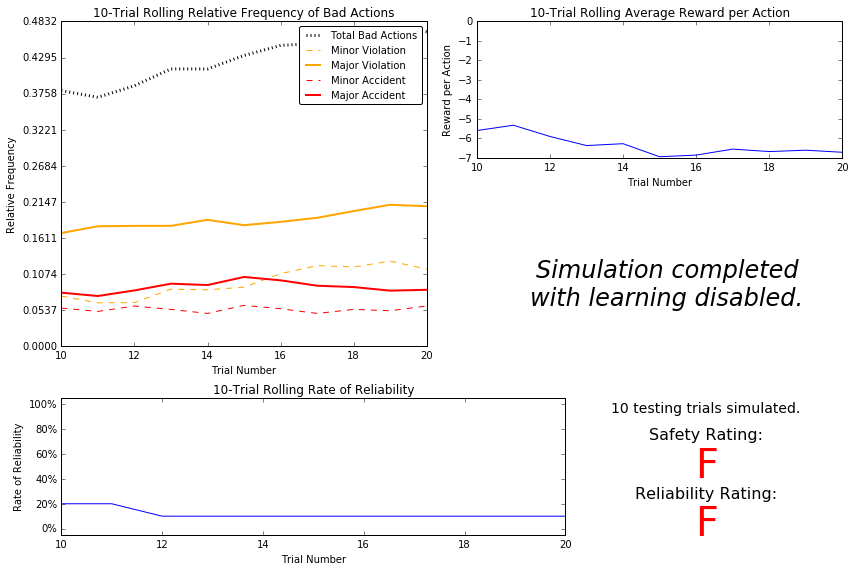

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The agent makes many bad decisions; according to the top-left panel somewhere between 38-48% of the time it does something that would lead to a minor or major traffic violation. About 13% of the time it makes decisions that would lead to accidents; roughly 5% of time minor ones and 8% of the time major ones.

Yes, given the agent is driving randomly with no knowledge of what consitutes safe actions, it make sense that it will have bad reliability. If anything I am a little suprised the bad decisions 'only' happen 38%-48% of the time, I might have expected the ratio to be even higher!

The agent is receiving on average very negative 'rewards', approximately -6.5 overall, as shown by top-right panel. This is expected due to its many violations.

As the number of trials increases the outcome of results do not change significantly. This is clear from all three graphs. In this earlier version of the code there is no learning - the movements of the smartcab are always random - so we have no reason to expect the results to change, let alone improve, as the number of trials increases.

Of course since the results are completely random the smartcab would not be considered either safe nor reliable! We can see from top-left panel that the car gets into many accidents and makes many major and minor traffic violations. Also from the bottom-left panel it is only ~10% realiable (by luck it did occasionally manage to reach the goal). Finally the bottom-right panel sums up everything nicely 'awarding' the car an F grade for both safety and reliability - deservedly so.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
To be able to move safely the smartcab needs to know about the colour of the 'light' and the whether or not there is 'oncoming' or 'left' traffic, so these three features are required. 'Light' alone should be enough to know the simpler conditions such as waiting at a red light, moving forward or turning right on green. For the slightly more complex conditions such as when it can turn left on a green light and right on a red light it requires the additional information about the 'oncoming' and 'left' traffic respectively.

Note that assuming all the cars on the road are following the traffic laws correctly, the smartcab in this scenario doesn't need to know about the 'right' feature. It will have an effect on the rewards it receives, since its value will determine whether it merely commits a violation or actually gets into an accident, but since we dont want the cab to even commit any violations at all I dont think there is any point trying to teach it this. Incidentally for a real-life self-driving car I dont think it would be fair to assume that all cars on the road are following laws correctly, so this simplification wouldnt work, but it's OK here!

In terms of efficiency the smartcab needs to know the 'waypoint' so it knows which way it should travel to head towards the goal. The 'deadline' feature is also important so it knows how much time it has left to reach the goal. If there was no deadline it is possible to imagine a scenario, for example, where the car needs to turn left, but is currently stopped from doing so by the red light. If there is no cross-traffic then the learner may realise it is safe to turn right and hence be rewarded for making a legal action, even though it takes it further away from the goal. Thus 'deadline' is important so it gets penalised for not reaching the goal in time.

NB: After working through Question 5 I modify the answer slightly to discard the 'deadline' feature since it causes too many different states to learn effectively. Similiarly to my argument about discarding 'right', whilst it does have an affect on the rewards it receives it is probably not necessary (or feasible) to train to this level of detail.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
'Light' has 2 options.
'Oncoming' has 4 options.
'Left' has 4 options.
'Waypoint' has 3 options (if you exclude the case it returns None when destination is reached since we dont need to learn anything in that case)
'Deadline' has "distance * 5" states and so will be different each time as it depends on the random choices of both start and destination location. However the program ensures distance is at least 4, so number of states for deadline is at least 20... which is large...

Minimum total number of states using all these features would be 2 * 4 * 4 * 3 * 20 = 1920. And this could get much larger quickly if distance is also larger. It is not at all realistic for the agent to learnt the best policy for all of these cases; if we run about 20 trials with about 20 time steps each it is only going to see around 400 conditions, around 20% of the possible states. Furthermore it is not sufficient just to see a state once to determine the best policy, it must be seen multiple times and have the chance to try different actions to see they affect its rewards.

Therefore I need to update my answer to Question 4 and we remove the 'deadline' feature; although it does provide some useful information it comes at too much of a cost. This will leave us with 96 possible states, which is still a lot but is much more reasonable and probably realistic within the training time available.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

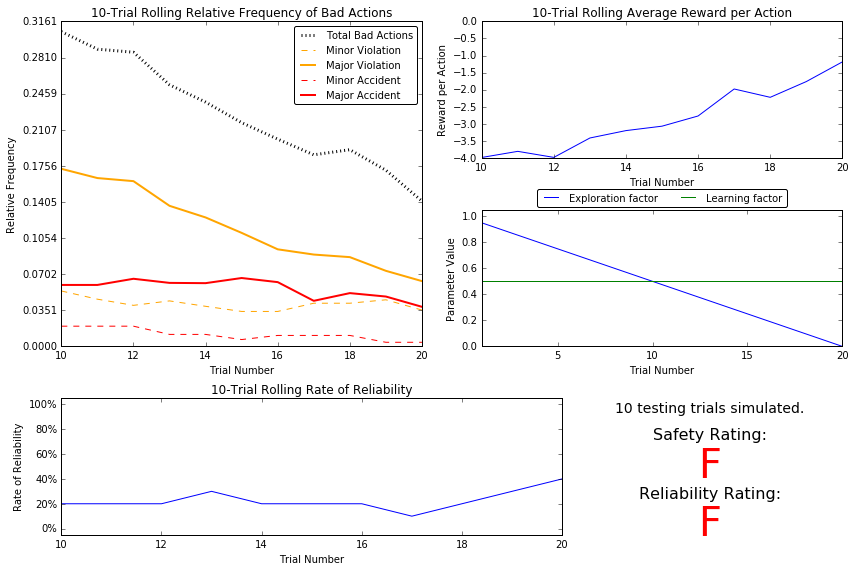

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

As shown by the top-left panel, by the end of the trials the driving agent is only making bad decisions about 14% of the time - much better than the ~48% of the initial non-learning version. Accidents occur about 7% of the time, which is again much better than the previous 13%. Also there is a clear trend that the number of incidents and accidents decrease as the number of the number of trials increase, which shows that learning is occuring, which is very exciting!

As shown by the top-right panel, the agent is still on average receiving negative rewards, with about -4 on average after 10 trials and rising to -1 after 20. This shows the learner still has work to do, but is definitely an approvement from the previous -6.5. Additionally the rise in average rewards as the number of trials increases again confirms that learning is occuring, which is the most important thing.

The bottom-left panel shows a positive increase in reliability as the number of trials increase, again signalling the learner is improving over time. By the end it is reaching the destination 40% of time, a big improvement of the previous 10%, and suggests some skill rather than just pure luck.

Unfortunately the only observations that remain unchanged between the basic agent and default Q-learning agent are the safety and reliability ratings which in all cases are the worst grade of F. This version of the agent would still not be considered safe to accept passengers and go on to the road. Much improvement is still required; this can be achieved by a mixture of longer training times and optimisation to the algorithm.

20 training trials were needed before testing. This makes sense since in this version of the agent episilon starts at 1 and then decays at a linear rate of 0.05 per time step. Tolerance is 0.05 and epsilon must go below this before training starts, so it takes 1/0.05 or 20 trials. Furthermore as we can see from the middle-right panel, epilson (in this graphic also called 'exploration factor') correctly reduces linearly over time, reaching 0 at step 20.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

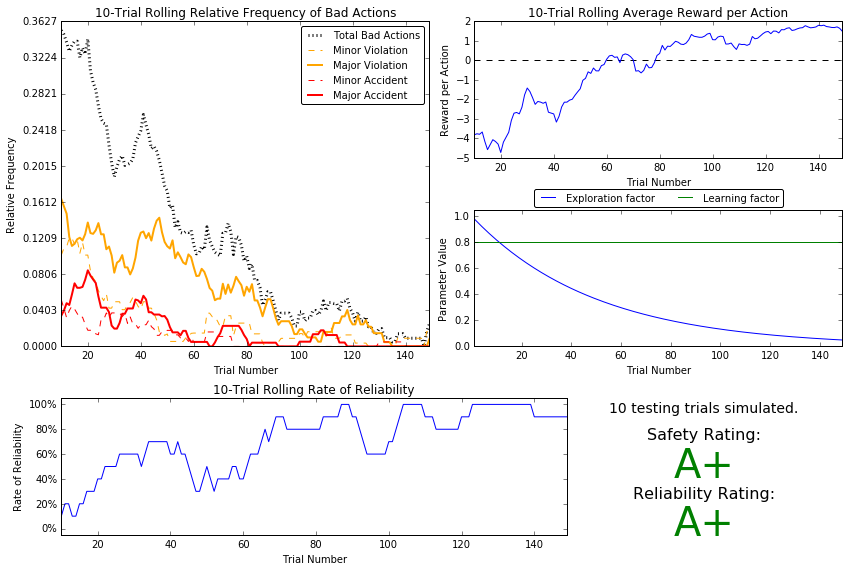

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
By the end of the trial the smartcab makes an error around 3% of the time, but most importantly accidents have reduced to practically zero. These are big improvements again over the previous ~14% and 7% errors. The rewards increased over time and reached consistent positive values of around +1.5, much better than the previous average negative values. The reliability also increased well over time, reaching 90% by the end which is miles better than the previous 40%.

I used a decay function of epsilon = 0.98^t in conjunction with the default epsilon of 0.05. I felt that the learning was working well in the original implementation and that the easiest and simplest way to improve its performance to start off with would be to increase the number of trials. I started with 0.9^t then 0.95^t and finally increased to 0.98^t as performance improved everytime. Now it takes about 150 trial runs before testing begins as shown by the middle-right panel.

As for alpha I settled on a value of 0.8. To start of with I tried 0.9 since I thought more learning would be better. To start off with this worked OK, getting around C or D grades for Safety and Reliability. But as I increased the number of trials it seems the learner overfit to reliability at the expense of safety and I began getting A+ and F grades respectively. Perhaps the rewards for reliability are weighted too highly and so the learner tries to go after that at the expense of safety? Because of this I toned down alpha a little to 0.8 and got excellent results, with A+ for both safety and reliability! This is a very satisfying result. 97% safety and 90% reliability are still too low to allow the smartcab on to the real road with real people however...but it is a really great start :)

All graphs show clearly that learning has taken place over time and the final excellent results suggest that the Q-learner has indeed learned an appropriate policy. I expect with a little more training time it would be possible to smooth out the remaining kinks and improve the safety and reliability even further.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
For example if the light is green and you want to move forward or turn right it is always OK to do so. If you want to turn left on green you must first check there are no oncoming cars either coming forward or turning right and if so you should wait. If the light is red and you want to go forward or left you must wait. However if you want to go right you can do so provided no cars from the left want to move forward.

The following is an example of a state that has been learned really well. The smartcab wants to go forward, but there is a red light, so the correct answer is to wait and do nothing. Indeed this is the highest score of 1.94. Forward itself is penalised -8.1 since this would lead to a major violation of running the red light. Left is much more heavily penalised (-32.5) because it would both go against the waypoint and lead to a major accident due to the oncoming traffic trying to turn right. Interestingly turning right has a low positive score (0.81); although it goes against the waypoint this move is legal given the current traffic circumstances and so the learner would receive a reward for doing so.

('forward', 'red', None, 'right')
 -- forward : -8.10
 -- None : 1.94
 -- right : 0.81
 -- left : -32.50
 
 An example where the learner has not learned the correct policy is as follows. It wants to turn left, but cannot due to the red light. However in this case due to lack of traffic from the left moving forward it is a legal move to turn right, and this is the optimal policy that the learner found. Similiarly to the previous example it gets a positive reward for doing this that must have been bigger than the negative reward it receives for going against the way point. However in contrast to the previous example we have a score of exactly zero for all other categories. This suggests not that it has learned the wrong thing as such, but that it never learned anything at all about these options; it never had a chance to test them. This suggests the learner could still be improved by running more trial iterations. Actually I found several states that had a similar pattern to this, with legal right turns dominating doing nothing. Perhaps the reward for correctly waiting needs to be made proportionally higher? I don't think this can be fixed easily just by playing with alpha, epsilon, etc. Another posibility is that due to the relative ease of the right turns the agent could be 'overruling' the waypoint and taking a longer but easier equivalent route, such as turning right three times to turn left, or even turning right 4 time to go forward! I heard some delivery drivers in real-life do actually do this, so its not impossible. However it is difficult to tell from just single-state Q-tables if that is actually what is occuring or not.
 
 ('left', 'red', 'left', 'forward')
 -- forward : 0.00
 -- None : 0.00
 -- right : 1.46
 -- left : 0.00

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
In this application safety is paramount. In some applications it may be OK to accept a short-term negative reward in order to receive a larger return in the future, but for a self-driving car that would be unacceptable. A crash now not only puts peoples' lives at risk but also should effectively become the end of the simulation (for example if the car can no longer move) thereby removing any possibility of future rewards, let alone big ones. Therefore there is no meaning to aim for future rewards at the expense of now.

In terms of environment the car only knows local information about the next waypoint - not global information like its position relative to the goal. Therefore the only sensible thing for the car to do is decide about what to do here and now and not try to second guess the future state. This is particularly important since the start and end point are different everytime and so are the movements of the other cars in the grid world. Thus if the agent used future rewards it would be basing its decisions on future states *from previous trials* which are not necessarily (and probably **not**) the same the future state the car will encounter this time around. It will try and optimise for a condition that doesnt exist which could lead to worse Q-values. Also there is no additional reward as such for reaching the goal; all rewards come from obeying traffic rules and following the planner. Thus there is nothing to propagate back from this goal state so we couldnt consider this even if trying to include future rewards.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.